# Project 2 Taxi trip Price/Fare Prediction

## Possible Applications

- Predicting taxi fares based on distance, traffic, and weather.
- Exploring the impact of time and conditions on pricing.
- Building regression models and comparing their performance.
- __Get started by analyzing the data, engineering features, and building models to optimize taxi fare predictions. Good luck!__

## Import Dependecies & Data collection

In [426]:
# import dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [427]:
# import machine learning dependencies

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [428]:
df = pd.read_csv('taxi_trip_pricing.csv')

In [429]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


## Exploratary Data Analysis

In [430]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

array([[<Axes: title={'center': 'Trip_Distance_km'}>,
        <Axes: title={'center': 'Passenger_Count'}>,
        <Axes: title={'center': 'Base_Fare'}>],
       [<Axes: title={'center': 'Per_Km_Rate'}>,
        <Axes: title={'center': 'Per_Minute_Rate'}>,
        <Axes: title={'center': 'Trip_Duration_Minutes'}>],
       [<Axes: title={'center': 'Trip_Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

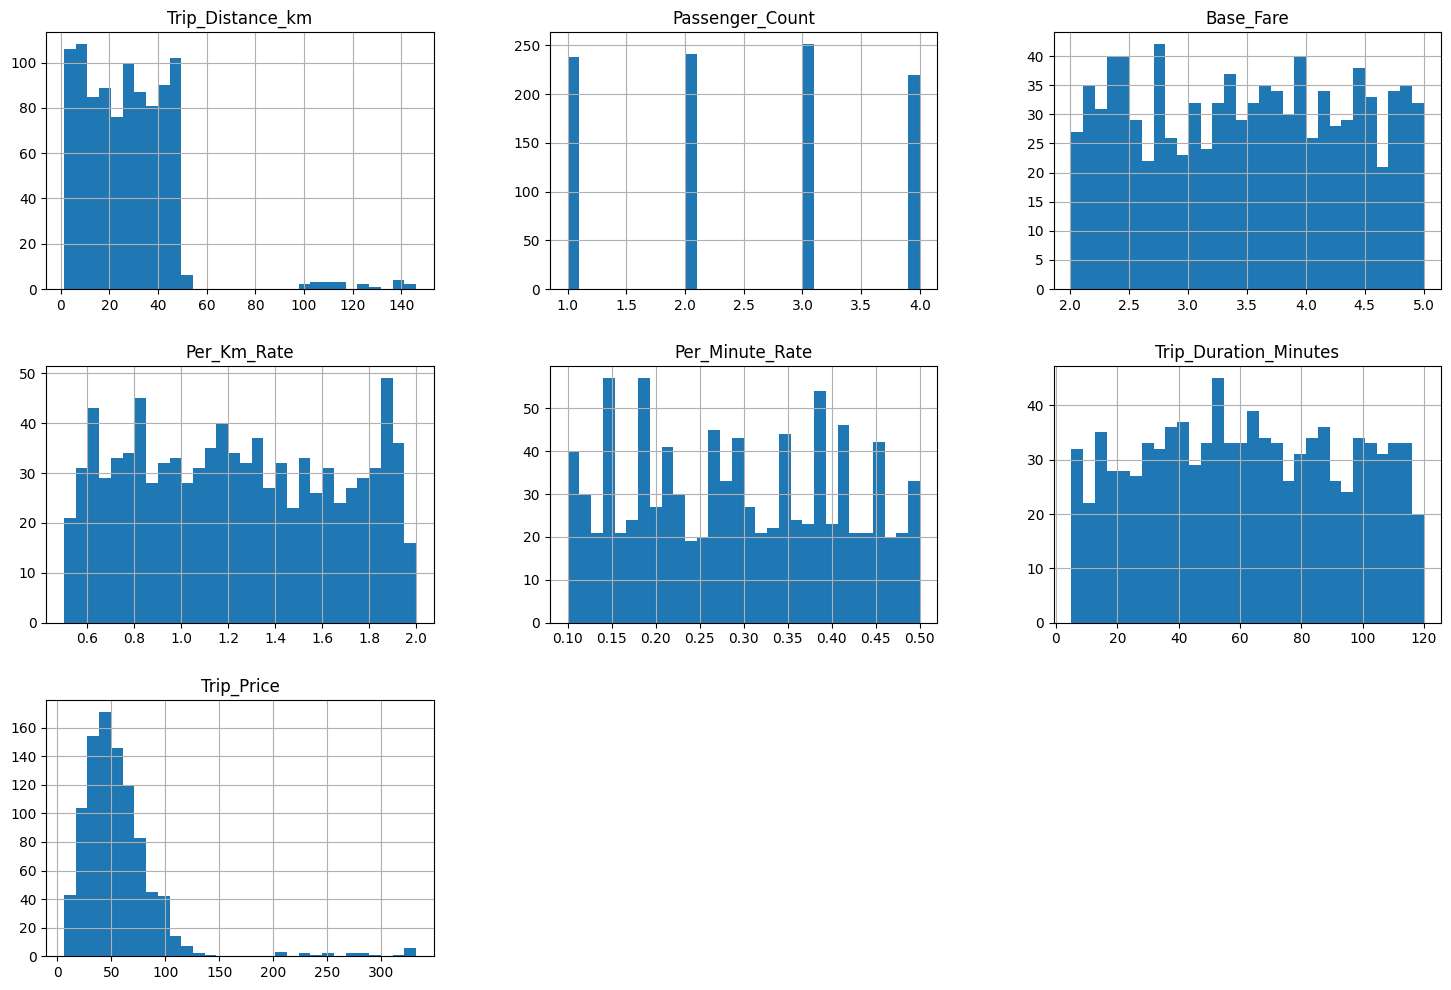

In [431]:
df.hist(bins = 30, figsize=(18,12))

- Cab distance trip is between 5 to 45 and their max average around is between 1 to 12 km
- Passenger count is 1 to 3
- The base price graph is inflated and the reason for this may also be the type of vehicle and its luxury.

<Axes: >

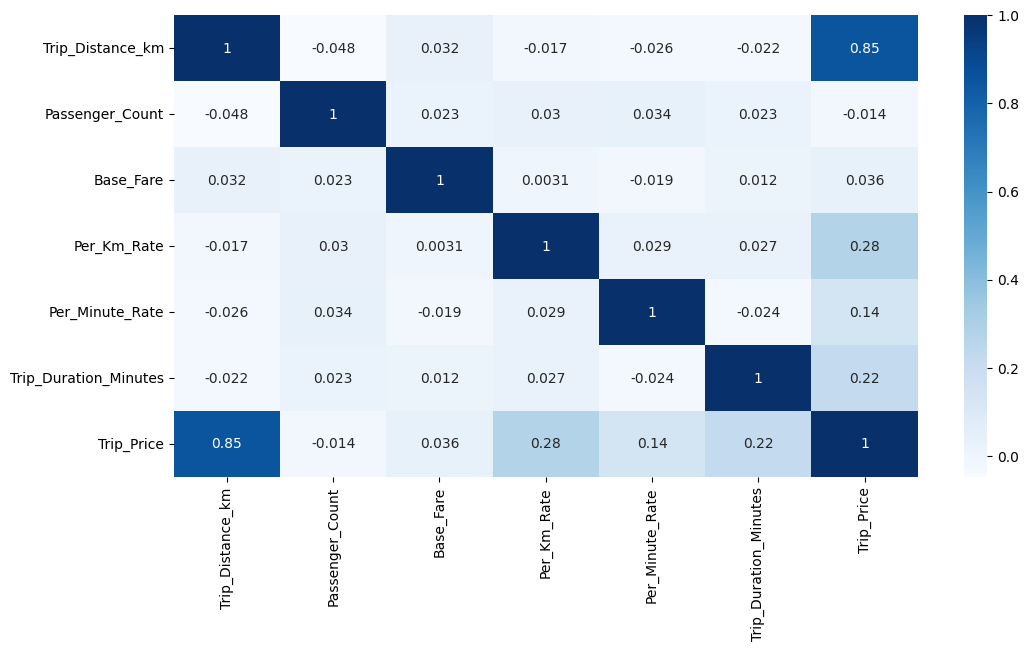

In [432]:
plt.figure(figsize=(12,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap = 'Blues')

- There is a positive correlation between Trip Distance and Trip Price.
- And Also (Per km, trip duration minute) and trip Price

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Trip_Distance_km'),
  Text(2, 0, 'Passenger_Count'),
  Text(3, 0, 'Base_Fare'),
  Text(4, 0, 'Per_Km_Rate'),
  Text(5, 0, 'Per_Minute_Rate'),
  Text(6, 0, 'Trip_Duration_Minutes'),
  Text(7, 0, 'Trip_Price')])

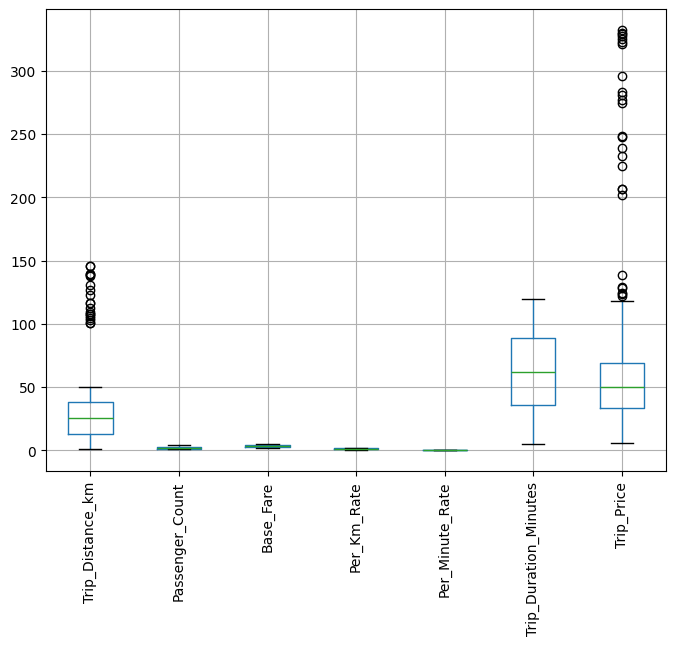

In [433]:
df.boxplot(figsize=(8,6))
plt.xticks(rotation = 90)

- Trip Distance has Outlier.
- Target column also has some Outlier but we not fixing this because of Trip Price may have higher price because of far distance or traffic

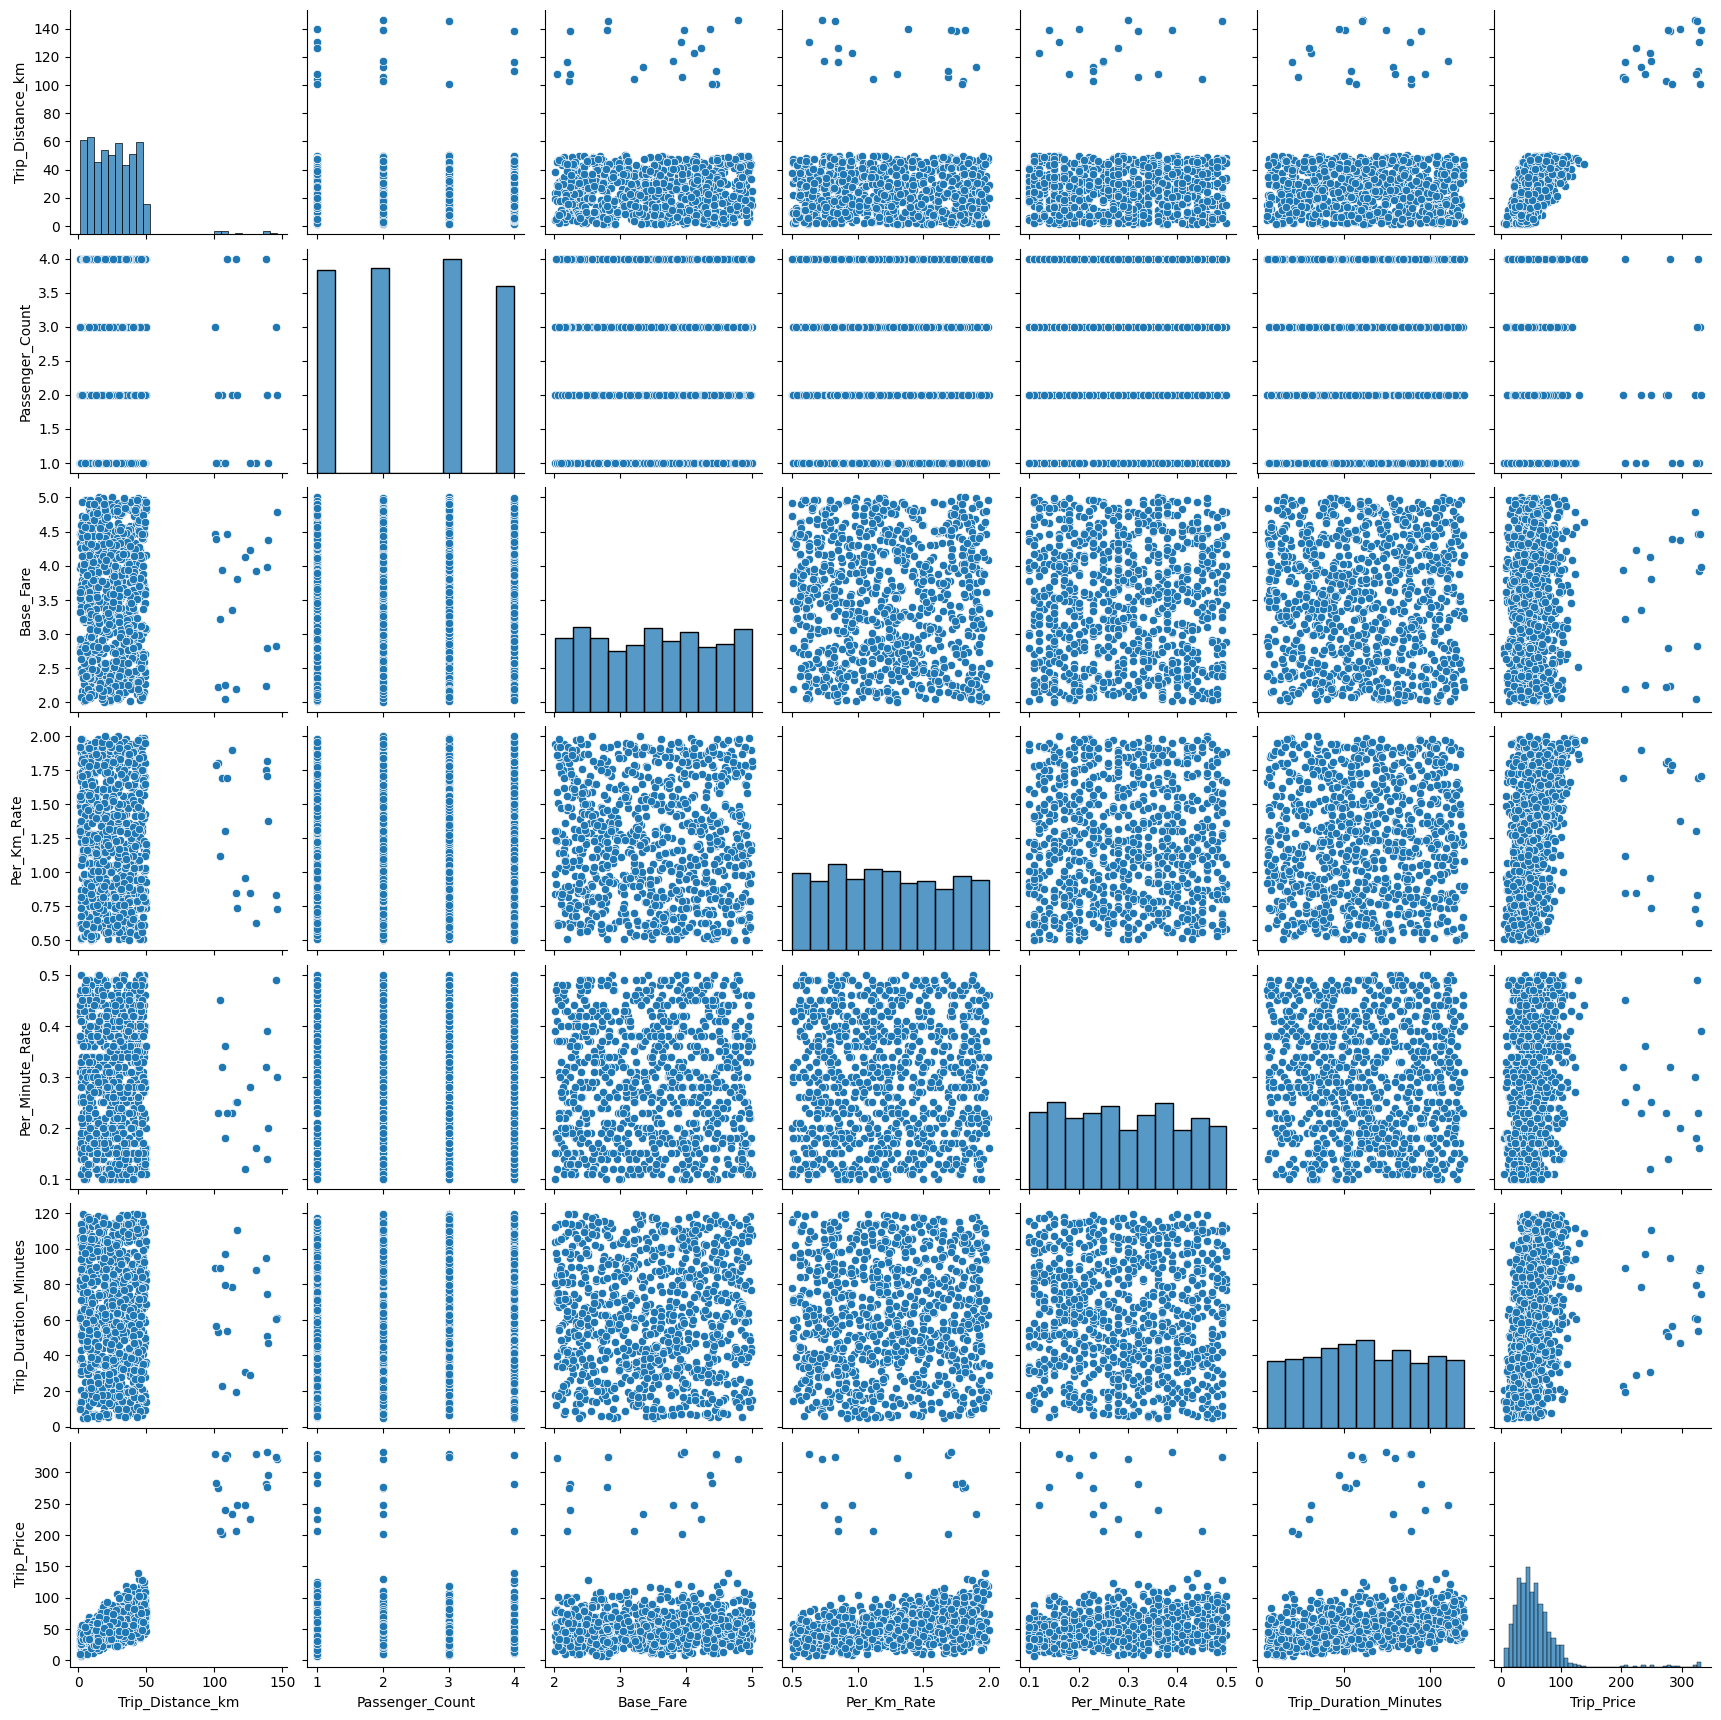

In [434]:
sns.pairplot(data=df)

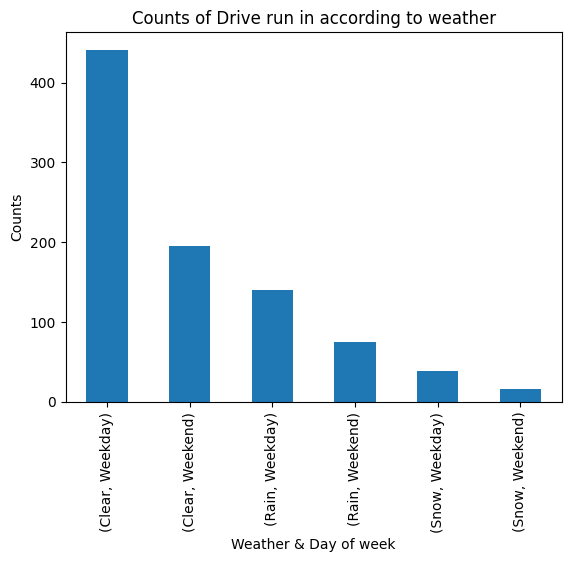

In [435]:
df.groupby('Weather')['Day_of_Week'].value_counts().plot(kind='bar')
plt.xlabel('Weather & Day of week')
plt.ylabel('Counts')
plt.title('Counts of Drive run in according to weather')
plt.show()

- When the weather is clear, more taxis run, if there is rain and snow the ratio of taxi run is low.

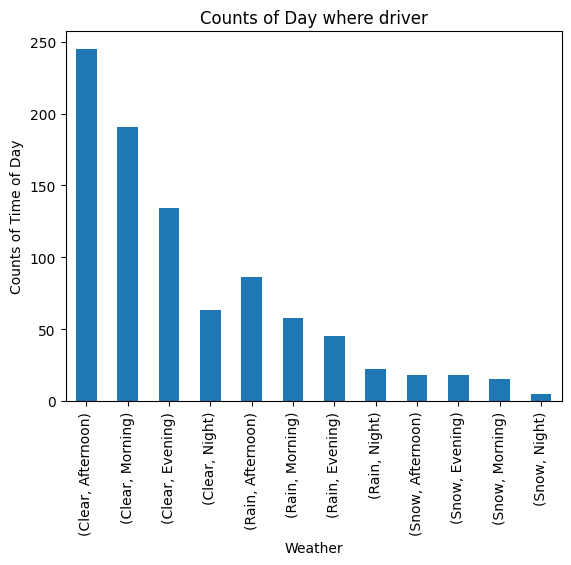

In [436]:
df.groupby('Weather')['Time_of_Day'].value_counts().plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('Counts of Time of Day')
plt.title('Counts of Day where driver')
plt.show()

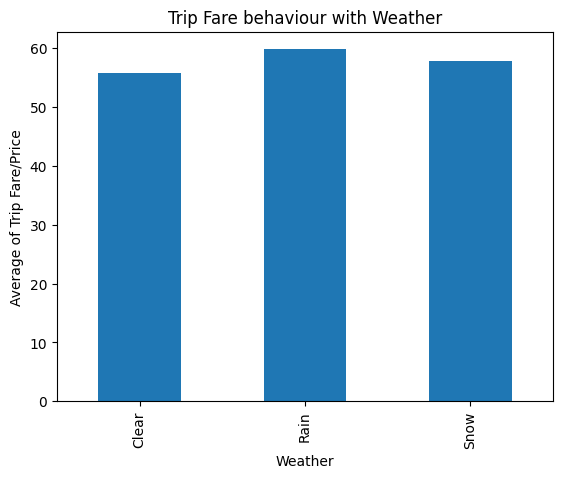

In [437]:
df.groupby('Weather')['Trip_Price'].mean().plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('Average of Trip Fare/Price')
plt.title('Trip Fare behaviour with Weather')
plt.show()

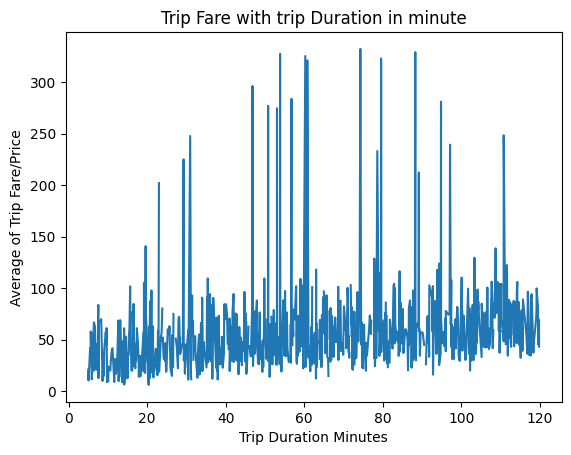

In [438]:
df.groupby('Trip_Duration_Minutes')['Trip_Price'].mean().plot(kind = 'line')
plt.xlabel('Trip Duration Minutes')
plt.ylabel('Average of Trip Fare/Price')
plt.title('Trip Fare with trip Duration in minute')
plt.show()

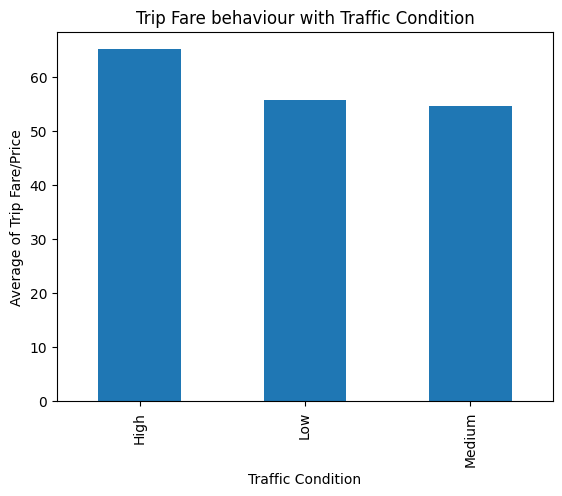

In [439]:
df.groupby('Traffic_Conditions')['Trip_Price'].mean().plot(kind = 'bar')
plt.xlabel('Traffic Condition')
plt.ylabel('Average of Trip Fare/Price')
plt.title('Trip Fare behaviour with Traffic Condition')
plt.show()

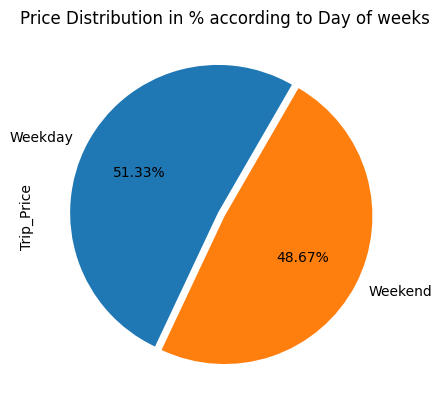

In [440]:
df.groupby('Day_of_Week')['Trip_Price'].mean().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0], startangle=60)
plt.title('Price Distribution in % according to Day of weeks')
plt.show()

<Axes: xlabel='Trip_Distance_km', ylabel='Trip_Price'>

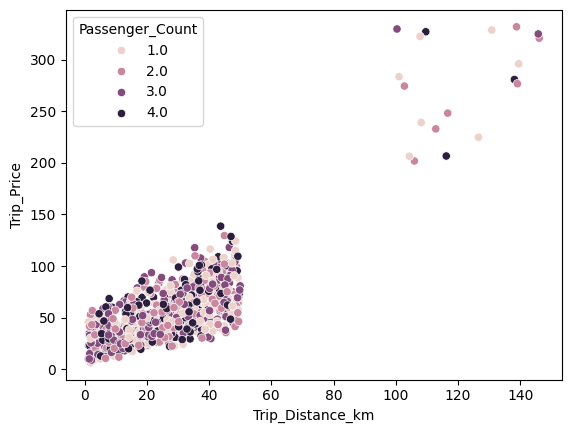

In [441]:
sns.scatterplot(x= df['Trip_Distance_km'], y = df['Trip_Price'], hue=df['Passenger_Count'])

<Axes: xlabel='Trip_Price', ylabel='Trip_Distance_km'>

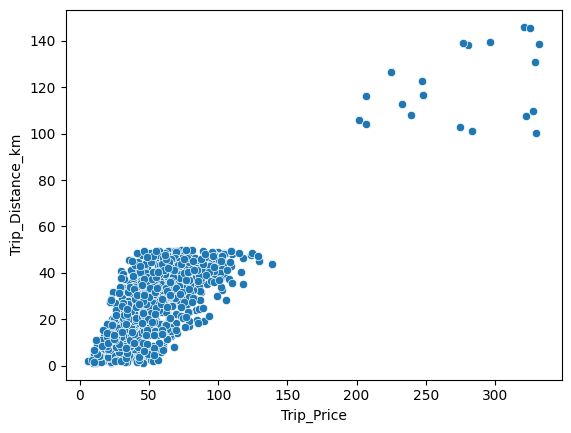

In [442]:
sns.scatterplot(x = df['Trip_Price'], y = df['Trip_Distance_km'])

## Preprocessing

#### Handle Missing values

In [443]:
## Checking null values
df.isnull().sum() / len(df)* 100

Trip_Distance_km         5.0
Time_of_Day              5.0
Day_of_Week              5.0
Passenger_Count          5.0
Traffic_Conditions       5.0
Weather                  5.0
Base_Fare                5.0
Per_Km_Rate              5.0
Per_Minute_Rate          5.0
Trip_Duration_Minutes    5.0
Trip_Price               4.9
dtype: float64

- All the dataset have 5% of missing values although We can drop it but we can fill values.

- __First we see object columns and integar columns__

In [444]:
category_columns = [cols for cols in df.columns if df[cols].dtype == 'object']
numeric_columns = [cols for cols in df.columns if df[cols].dtype != 'object']

In [445]:
category_columns

['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

- First we tackle category missing columns

In [446]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [447]:
for column in [cols for cols in df.columns if df[cols].dtype == 'object']:
    mode_value = df[column].mode()[0]  
    df[column].fillna(mode_value, inplace=True)
    
print(df.isnull().sum())

Trip_Distance_km         50
Time_of_Day               0
Day_of_Week               0
Passenger_Count          50
Traffic_Conditions        0
Weather                   0
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


- numeric missing columns

In [449]:
for column in [cols for cols in df.columns if df[cols].dtype != 'object']:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)

df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

- Take care all the missing values

## LabelEncoding

In [451]:
df.head(2)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773


In [452]:
le = LabelEncoder()

df["Time_of_Day"] = le.fit_transform(df['Time_of_Day'])
df['Day_of_Week'] = le.fit_transform(df['Day_of_Week'])
df["Traffic_Conditions"] = le.fit_transform(df['Traffic_Conditions'])
df['Weather'] = le.fit_transform(df['Weather'])

In [453]:
df.head(2)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400
1,47.59,0,0,1.0,0,0,3.502989,0.62,0.43,40.57,56.874773


## Machine Learning

### Model splitting & training

In [454]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,0,0,1.0,0,0,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,1,1,1.0,0,0,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,1,0,4.0,1,0,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,1,0,3.0,0,0,2.930000,0.63,0.32,22.64,15.618000


In [456]:
x = df[['Trip_Distance_km', 'Traffic_Conditions', 'Weather']]
y = df['Trip_Price']

In [457]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [458]:
print(f'X_train shape ->  {X_train.shape}')
print(f'X_test shape ->   {X_test.shape}')
print(f'y_train shape ->  {y_train.shape}')
print(f'y_test shape ->   {y_test.shape}')

X_train shape ->  (800, 3)
X_test shape ->   (200, 3)
y_train shape ->  (800,)
y_test shape ->   (200,)


- Linear Regression

In [459]:
linear_pipe = Pipeline([('scaler', StandardScaler()),
                       ('clf', LinearRegression())])

linear_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LinearRegression())])

In [460]:
linear_y_pred = linear_pipe.predict(X_test)

In [461]:
mean_absolute_error = metrics.mean_absolute_error(y_test, linear_y_pred)
mean_squared_error = metrics.mean_squared_error(y_test, linear_y_pred)
linear_r2  = metrics.r2_score(y_test, linear_y_pred)
root_mean_sqaured_error = metrics.root_mean_squared_error(y_test, linear_y_pred)


print(f'mean_absolute_error      :   {mean_absolute_error}')
print(f'mean_squared_error       :   {mean_squared_error}')
print(f'r2_score                 :   {linear_r2}')
print(f'root_mean_sqaured_error  :   {root_mean_sqaured_error}')

mean_absolute_error      :   15.612936976280746
mean_squared_error       :   449.70776181193054
r2_score                 :   0.7475036650559901
root_mean_sqaured_error  :   21.206314196765323


- Decision tree

In [462]:
tree_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('clf', DecisionTreeRegressor())])

tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', DecisionTreeRegressor())])

In [463]:
tree_pred = tree_pipeline.predict(X_test)

In [465]:
mean_absolute_error = metrics.mean_absolute_error(y_test, tree_pred)
mean_squared_error = metrics.mean_squared_error(y_test, tree_pred)
tree_r2  = metrics.r2_score(y_test, tree_pred)
root_mean_sqaured_error = metrics.root_mean_squared_error(y_test, tree_pred)


print(f"An MAE of {mean_absolute_error} means that, on average, the model's predictions are approximately ${mean_absolute_error} away from the true taxi prices.")
print(f"An MSE of {mean_squared_error} means that, on average, the squared prediction errors are approximately {mean_squared_error}.")
print(f"An R² of {tree_r2} indicates that the model can explain approximately {tree_r2}% of the variance in taxi prices.")
print(f"An RMSE of {root_mean_sqaured_error} indicates that, on average, the model's predictions have an error of approximately ${root_mean_sqaured_error} in the same units as the Taxi prices.")

An MAE of 21.543667490915265 means that, on average, the model's predictions are approximately $21.543667490915265 away from the true taxi prices.
An MSE of 753.7695365137138 means that, on average, the squared prediction errors are approximately 753.7695365137138.
An R² of 0.576782832043375 indicates that the model can explain approximately 0.576782832043375% of the variance in taxi prices.
An RMSE of 27.454863622202055 indicates that, on average, the model's predictions have an error of approximately $27.454863622202055 in the same units as the Taxi prices.


- Random Forest

In [466]:
forest_pipeline = Pipeline([('scaler', StandardScaler()), 
                           ('clf', RandomForestRegressor())])

forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', RandomForestRegressor())])

In [467]:
forest_pred = forest_pipeline.predict(X_test)

In [468]:
mean_absolute_error = metrics.mean_absolute_error(y_test, forest_pred)
mean_squared_error = metrics.mean_squared_error(y_test, forest_pred)
forest_r2  = metrics.r2_score(y_test, forest_pred)
root_mean_sqaured_error = metrics.root_mean_squared_error(y_test, forest_pred)


print(f"An MAE of {mean_absolute_error} means that, on average, the model's predictions are approximately ${mean_absolute_error} away from the true taxi prices.")
print(f"An MSE of {mean_squared_error} means that, on average, the squared prediction errors are approximately {mean_squared_error}.")
print(f"An R² of {forest_r2} indicates that the model can explain approximately {forest_r2}% of the variance in taxi prices.")
print(f"An RMSE of {root_mean_sqaured_error} indicates that, on average, the model's predictions have an error of approximately ${root_mean_sqaured_error} in the same units as the Taxi prices.")

An MAE of 17.49922921567694 means that, on average, the model's predictions are approximately $17.49922921567694 away from the true taxi prices.
An MSE of 470.8903674382723 means that, on average, the squared prediction errors are approximately 470.8903674382723.
An R² of 0.7356103184442578 indicates that the model can explain approximately 0.7356103184442578% of the variance in taxi prices.
An RMSE of 21.700008466317986 indicates that, on average, the model's predictions have an error of approximately $21.700008466317986 in the same units as the Taxi prices.


- support vector machine

In [469]:
svm_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('clf', SVR())])

svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVR())])

In [470]:
svm_pred = svm_pipeline.predict(X_test)

In [471]:
mean_absolute_error = metrics.mean_absolute_error(y_test, svm_pred)
mean_squared_error = metrics.mean_squared_error(y_test, svm_pred)
svm_r2  = metrics.r2_score(y_test, svm_pred)
root_mean_sqaured_error = metrics.root_mean_squared_error(y_test, svm_pred)


print(f"An MAE of {round(mean_absolute_error, 2)} means that, on average, the model's predictions are approximately ${round(mean_absolute_error, 2)} away from the true taxi prices.")
print(f"An MSE of {mean_squared_error} means that, on average, the squared prediction errors are approximately {mean_squared_error}.")
print(f"An R² of {svm_r2} indicates that the model can explain approximately {round(svm_r2,2)}% of the variance in taxi prices.")
print(f"An RMSE of {root_mean_sqaured_error} indicates that, on average, the model's predictions have an error of approximately ${root_mean_sqaured_error} in the same units as the Taxi prices.")

An MAE of 20.4 means that, on average, the model's predictions are approximately $20.4 away from the true taxi prices.
An MSE of 1476.175936168701 means that, on average, the squared prediction errors are approximately 1476.175936168701.
An R² of 0.1711750490732774 indicates that the model can explain approximately 0.17% of the variance in taxi prices.
An RMSE of 38.421035074145266 indicates that, on average, the model's predictions have an error of approximately $38.421035074145266 in the same units as the Taxi prices.


- We are going with Random Forest

In [472]:
df.sample(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
299,5.18,1,0,2.0,2,0,2.49,1.290000,0.21,59.81,21.732300
294,7.23,1,0,1.0,1,0,3.51,1.200000,0.39,55.29,33.749100
167,10.14,0,0,4.0,1,1,4.50,1.620000,0.38,25.41,56.874773
629,13.37,0,0,2.0,1,1,2.85,1.920000,0.19,114.32,50.241200
512,46.70,3,0,2.0,2,0,4.94,1.233316,0.35,14.65,53.031500


In [473]:
forest_regressor = RandomForestRegressor()

forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [474]:
new_pred_forest = forest_regressor.predict(X_test)

In [475]:
forest_mae = metrics.mean_absolute_error(y_test, new_pred_forest)
forest_mse = metrics.mean_squared_error(y_test, new_pred_forest)
forest_r2 = metrics.r2_score(y_test, new_pred_forest)
forest_rmse = metrics.root_mean_squared_error(y_test, new_pred_forest)

print(forest_mae)
print(forest_mse)
print(forest_r2)
print(forest_rmse)

17.449166115649177
472.6698338097365
0.734611205742399
21.740971317071747


## Random Forest hypertunning

In [476]:
reg_forest = RandomForestRegressor()

In [477]:
forest_param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [478]:
forest_grid = GridSearchCV(reg_forest, param_grid=forest_param_grid, cv=5)

forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [479]:
forest_grid.best_params_

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}

In [480]:
forest_grid.best_score_

np.float64(0.7212544341350215)

In [481]:
new_forest_regressor = RandomForestRegressor(max_depth= 6, max_features =  None, max_leaf_nodes = 9, n_estimators = 150)

new_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=150)

In [482]:
y_pred = new_forest_regressor.predict(X_test)

In [483]:
forest_mae = metrics.mean_absolute_error(y_test, y_pred)
forest_mse = metrics.mean_squared_error(y_test, y_pred)
hypertune_forest_r2 = metrics.r2_score(y_test, y_pred)
forest_rmse = metrics.root_mean_squared_error(y_test, y_pred)

print(forest_mae)
print(forest_mse)
print(hypertune_forest_r2)
print(forest_rmse)

15.217601348437343
364.8863646549399
0.7951281308216647
19.101998970132417


In [484]:
new_forest_regressor.score(X_test, y_test)

0.7951281308216647

In [485]:
model_name = ['linear_regression', 'decision_tree', 'Random_forest', 'support_vector_machine', 'RandomForest_hypertuning']
scores = [linear_r2, tree_r2, forest_r2, svm_r2,hypertune_forest_r2]

<Axes: >

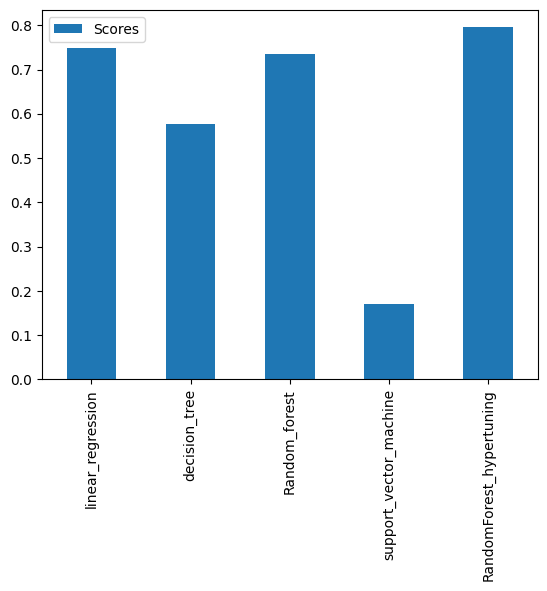

In [486]:
pd.DataFrame(data= scores, index = model_name, columns= ['Scores']).plot(kind='bar')

## Old Random Forest is better than new one so we go with old one

## Prediction System

In [331]:
df.sample(4)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
810,49.26,0,0,4.0,1,0,3.09,1.95,0.29,35.46,109.4304
782,13.34,0,1,4.0,1,0,4.29,0.71,0.45,87.97,53.3479
384,37.02,0,0,4.0,0,0,3.44,1.91,0.14,89.21,87.8962
219,42.61,2,0,3.0,1,1,2.43,0.94,0.49,62.01,72.8683


In [487]:
import pickle

In [505]:
pickle.dump(new_forest_regressor, open('new_forest_regressor.pkl', 'wb'))
pickle.dump(le, open('le.pkl', 'wb'))

In [506]:
user_input = pd.DataFrame(data = [[37.02,'High','Clear']], columns = ['Trip_Distance_km', 'Traffic_Conditions', 'Weather'])

In [507]:
user_input

,Trip_Distance_km,Traffic_Conditions,Weather
0,37.02,High,Clear


In [508]:
pickle.load(open('new_forest_regressor.pkl', 'rb'))
pickle.load(open('le.pkl', 'rb'))

LabelEncoder()

In [509]:
user_input['Traffic_Conditions'] = user_input['Traffic_Conditions'].map({'Low':1, 'High':0, 'Medium':2})
user_input['Weather'] = user_input['Weather'].map({'Clear':0, 'Rain':1, 'Snow':2})

In [510]:
user_input

,Trip_Distance_km,Traffic_Conditions,Weather
0,37.02,0,0


In [511]:
forest_regressor.predict(user_input)

array([70.213828])